In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
df = pd.read_csv(r"D:\Intermediate_task\Time series analysis\Stock Prices Data Set.csv")   
df["date"] = pd.to_datetime(df["date"]) 
df = df.dropna(subset=["date"])  # drop invalid dates
df = df.sort_values("date") 

df.set_index("date", inplace=True)

In [34]:
df = df[~df.index.duplicated(keep="first")]


In [36]:
df["open"] = pd.to_numeric(df["open"], errors="coerce")
df = df.dropna(subset=["open"])


In [37]:
ts = df["open"]

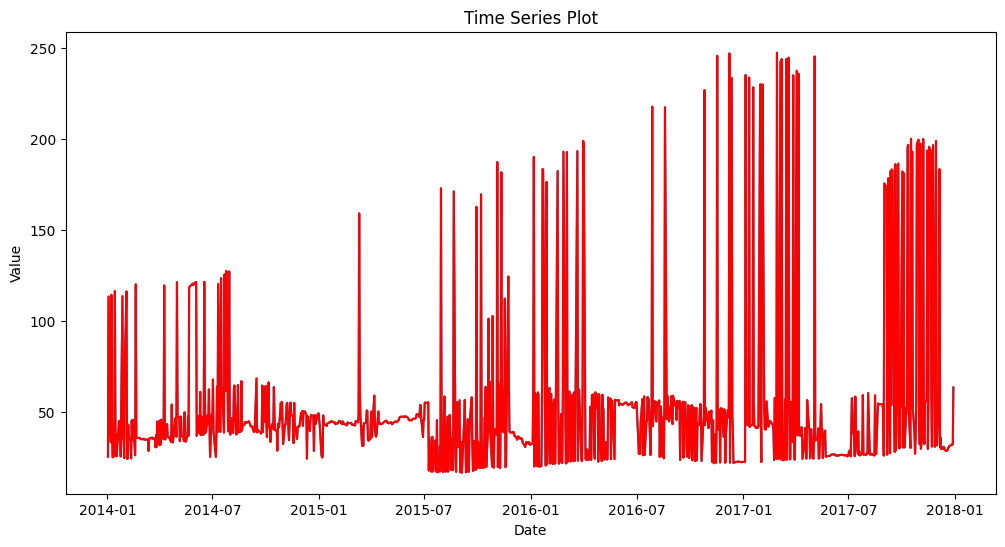

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(ts)
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")

plt.plot(ts, color='red')
plt.show()

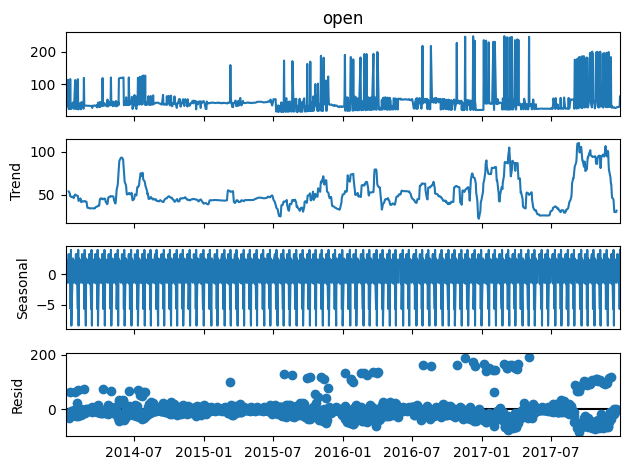

In [39]:
ts = ts.dropna()
result = seasonal_decompose(ts, model='additive', period=12)

result.plot()
plt.show()


Moving average smoothing

In [40]:
df["MA_7"] = ts.rolling(window=7).mean()      
df["MA_30"] = ts.rolling(window=30).mean()    


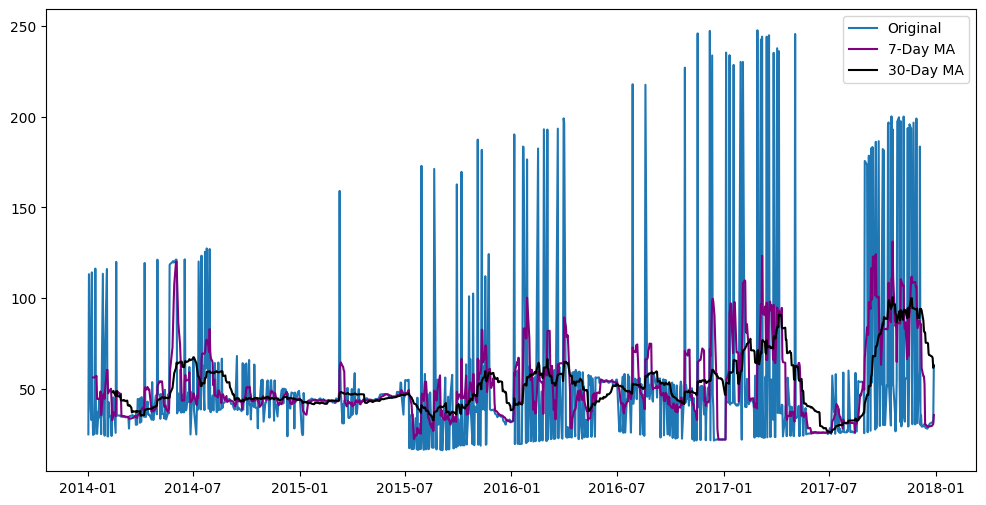

In [42]:
plt.figure(figsize=(12,6))
plt.plot(ts, label="Original")
plt.plot(df["MA_7"], label="7-Day MA", color="purple")
plt.plot(df["MA_30"], label="30-Day MA", color="black")
plt.legend()
plt.show()
